In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import os

In [2]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
torch.manual_seed(1)

In [24]:
def model_train(model, input_data, output_data):
    if isinstance(input_data, np.ndarray):
        input_data = torch.tensor(input_data, dtype=torch.float32)
    if isinstance(output_data, np.ndarray):
        output_data = torch.tensor(output_data, dtype=torch.float32)

    max_epoch = 20000
    epoch_arr, loss_arr = [], []
    not_converged = True
    epoch = 0
    
    while not_converged:
        epoch += 1
        prediction = model(input_data)
        
        # Compute loss
        loss = loss_func(prediction, output_data)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Store epoch and loss for tracking
        epoch_arr.append(epoch)
        loss_arr.append(loss.item()) 
        if epoch % 1000 == 0:
            print(f'epoch: {epoch}, loss = {loss.item():.4f}')
        if epoch == max_epoch:
            print("Epoch Reached Max size")
            not_converged = False
        elif (epoch > 5) and (loss_arr[-1] < 0.001):
            if abs(loss_arr[-3] - loss_arr[-2]) < 1.0e-05 and abs(loss_arr[-2] - loss_arr[-1]) < 1.0e-05:
                print(f"Convergence reached at Epoch {epoch} with Loss: {loss_arr[-1]:.6f}")
                not_converged = False
    return epoch_arr, loss_arr, prediction

# Function 1

In [25]:
input_data = np.expand_dims(np.arange(-1.5, 1.5, 0.01),1)
print(input_data.shape)
output_data = np.sinc(5*input_data)
print(output_data.shape)

(300, 1)
(300, 1)


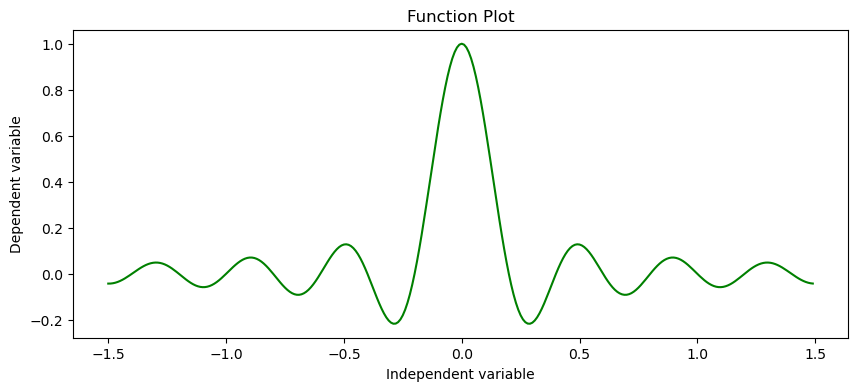

In [26]:
def ensure_tensor(data):
    if isinstance(data, torch.Tensor):
        return data.float()
    return torch.tensor(data, dtype=torch.float32)

input_data = ensure_tensor(input_data)
output_data = ensure_tensor(output_data)
plt.figure(figsize=(10, 4))
plt.plot(input_data.numpy(), output_data.numpy(), color="green")
plt.title('Function Plot')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.show()


## Model 1

In [7]:
class FirstNetworkModel(nn.Module):
    def __init__(self,):
        super(FirstNetworkModel, self).__init__()
        self.linear1 = nn.Linear(1, 5)
        self.linear2 = nn.Linear(5, 10)
        self.linear3 = nn.Linear(10, 10)
        self.linear4 = nn.Linear(10, 10)
        self.linear5 = nn.Linear(10, 10)
        self.linear6 = nn.Linear(10, 10)
        self.linear7 = nn.Linear(10, 5)
        self.predict = nn.Linear(5, 1)

    def forward(self,input_data):
        input_data = nn.functional.leaky_relu(self.linear1(input_data))
        input_data = nn.functional.leaky_relu(self.linear2(input_data))
        input_data = nn.functional.leaky_relu(self.linear3(input_data))
        input_data = nn.functional.leaky_relu(self.linear4(input_data))
        input_data = nn.functional.leaky_relu(self.linear5(input_data))
        input_data = nn.functional.leaky_relu(self.linear6(input_data))
        input_data = nn.functional.leaky_relu(self.linear7(input_data))

        input_data = self.predict(input_data)
        return input_data

model_1 = FirstNetworkModel()

In [8]:
optimizer = torch.optim.RMSprop(
    params=model_1.parameters(), 
    lr=1e-3, 
    weight_decay=1e-4
)
loss_func = torch.nn.MSELoss()
def count_parameters(model):
    return sum(p.numel() for p in model.parameters())

pytorch_total_params = count_parameters(model_1)
print(pytorch_total_params)
m1_epoch_arr, m1_loss_arr, m1_prediction = model_train(model_1, input_data, output_data)


571
epoch: 1000, loss = 0.0028
epoch: 2000, loss = 0.0025
epoch: 3000, loss = 0.0024
epoch: 4000, loss = 0.0024
epoch: 5000, loss = 0.0025
epoch: 6000, loss = 0.0021
epoch: 7000, loss = 0.0020
epoch: 8000, loss = 0.0019
epoch: 9000, loss = 0.0016
epoch: 10000, loss = 0.0014
epoch: 11000, loss = 0.0014
epoch: 12000, loss = 0.0018
epoch: 13000, loss = 0.0013
epoch: 14000, loss = 0.0015
epoch: 15000, loss = 0.0013
epoch: 16000, loss = 0.0018
Convergence reached at Epoch 16966 with Loss: 0.000998


## Model 2

In [27]:
class SecondNetworkModel(nn.Module):
    def __init__(self,):
        super(SecondNetworkModel, self).__init__()
        self.linear1 = nn.Linear(1, 10)
        self.linear2 = nn.Linear(10, 18)
        self.linear3 = nn.Linear(18, 15)
        self.linear4 = nn.Linear(15, 4)
        self.predict = nn.Linear(4, 1)

    def forward(self,input_data):
        input_data = nn.functional.leaky_relu(self.linear1(input_data))
        input_data = nn.functional.leaky_relu(self.linear2(input_data))
        input_data = nn.functional.leaky_relu(self.linear3(input_data))
        input_data = nn.functional.leaky_relu(self.linear4(input_data))

        input_data = self.predict(input_data)
        return input_data

model_2 = SecondNetworkModel()

In [28]:
optimizer = torch.optim.RMSprop(
    params=model_2.parameters(), 
    lr=1e-3, 
    weight_decay=1e-4
)
loss_func = torch.nn.MSELoss()
def calculate_total_params(model):
    total_params = 0
    for param in model.parameters():
        total_params += param.numel()
    return total_params

pytorch_total_params = calculate_total_params(model_2)
print(pytorch_total_params)
m2_epoch_arr, m2_loss_arr, m2_prediction = model_train(model_2, input_data, output_data)


572
epoch: 1000, loss = 0.0030
epoch: 2000, loss = 0.0023
epoch: 3000, loss = 0.0023
epoch: 4000, loss = 0.0024
epoch: 5000, loss = 0.0022
epoch: 6000, loss = 0.0017
epoch: 7000, loss = 0.0017
epoch: 8000, loss = 0.0017
epoch: 9000, loss = 0.0016
epoch: 10000, loss = 0.0015
epoch: 11000, loss = 0.0013
epoch: 12000, loss = 0.0014
epoch: 13000, loss = 0.0012
epoch: 14000, loss = 0.0014
epoch: 15000, loss = 0.0014
epoch: 16000, loss = 0.0012
epoch: 17000, loss = 0.0012
epoch: 18000, loss = 0.0013
epoch: 19000, loss = 0.0011
epoch: 20000, loss = 0.0013
Epoch Reached Max size


## Model 3

In [29]:
class ThirdNetworkModel(nn.Module):
    def __init__(self,):
        super(ThirdNetworkModel, self).__init__()
        self.linear1 = nn.Linear(1, 190)
        self.predict = nn.Linear(190, 1)

    def forward(self,input_data):
        input_data = nn.functional.leaky_relu(self.linear1(input_data))
        input_data = self.predict(input_data)
        return input_data

model_3 = ThirdNetworkModel()

In [30]:
optimizer = torch.optim.RMSprop(
    model_3.parameters(), 
    lr=1e-3, 
    weight_decay=1e-4
)
loss_func = torch.nn.MSELoss()
total_params = torch.cat([p.view(-1) for p in model_3.parameters()]).numel()
print(total_params)
m3_epoch_arr, m3_loss_arr, m3_prediction = model_train(model_3, input_data, output_data)


571
epoch: 1000, loss = 0.0208
epoch: 2000, loss = 0.0130
epoch: 3000, loss = 0.0097
epoch: 4000, loss = 0.0080
epoch: 5000, loss = 0.0071
epoch: 6000, loss = 0.0065
epoch: 7000, loss = 0.0061
epoch: 8000, loss = 0.0059
epoch: 9000, loss = 0.0057
epoch: 10000, loss = 0.0056
epoch: 11000, loss = 0.0054
epoch: 12000, loss = 0.0053
epoch: 13000, loss = 0.0052
epoch: 14000, loss = 0.0052
epoch: 15000, loss = 0.0051
epoch: 16000, loss = 0.0050
epoch: 17000, loss = 0.0049
epoch: 18000, loss = 0.0049
epoch: 19000, loss = 0.0049
epoch: 20000, loss = 0.0048
Epoch Reached Max size


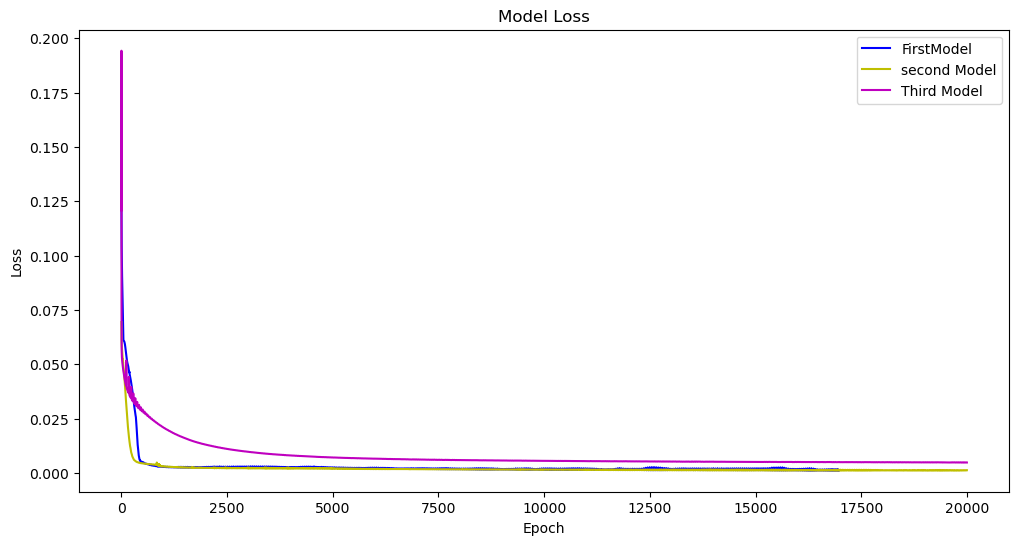

In [31]:
plt.figure(figsize=(12,6))
plt.plot(m1_epoch_arr, m1_loss_arr, color = "b")
plt.plot(m2_epoch_arr, m2_loss_arr, color = "y")
plt.plot(m3_epoch_arr, m3_loss_arr, color = "m")
plt.title('Model Loss')
plt.legend(['FirstModel', 'second Model','Third Model'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

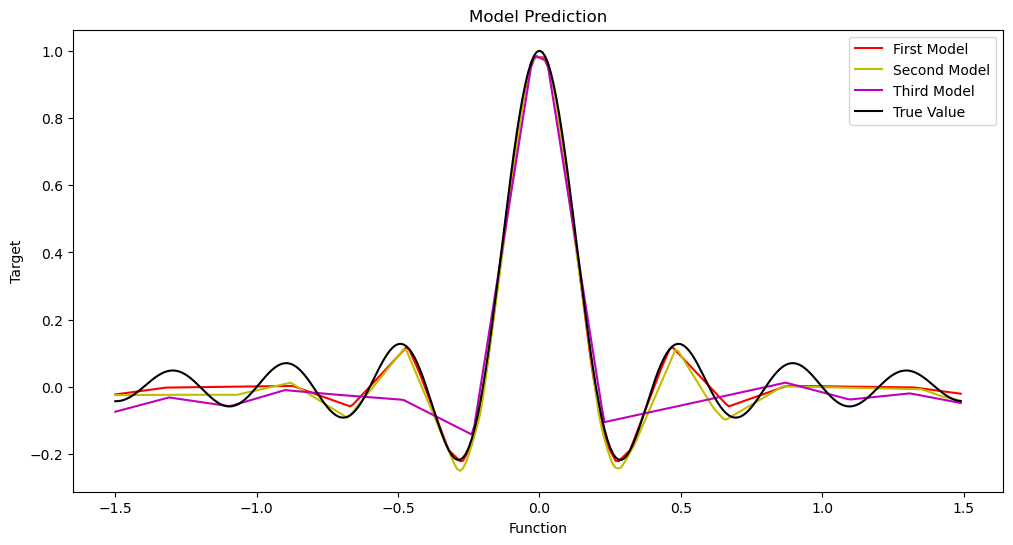

In [32]:
plt.figure(figsize=(12,6))
plt.plot(input_data, m1_prediction.data, color="r", label = 'First Model')
plt.plot(input_data, m2_prediction.data, color="y", label = 'Second Model')
plt.plot(input_data, m3_prediction.data, color="m", label = 'Third Model')
plt.plot(input_data, output_data, color="black", label = 'True Value')
plt.title('Model Prediction')
plt.xlabel('Function')
plt.ylabel('Target')
plt.legend()
plt.show()

# Function 2

In [33]:
torch.manual_seed(1)

In [34]:
input = np.expand_dims(np.arange(-1.5, 1.5, 0.01), 1)
print(input.shape)
output = np.sign(np.sin(5*np.pi*input))
print(output.shape)

(300, 1)
(300, 1)


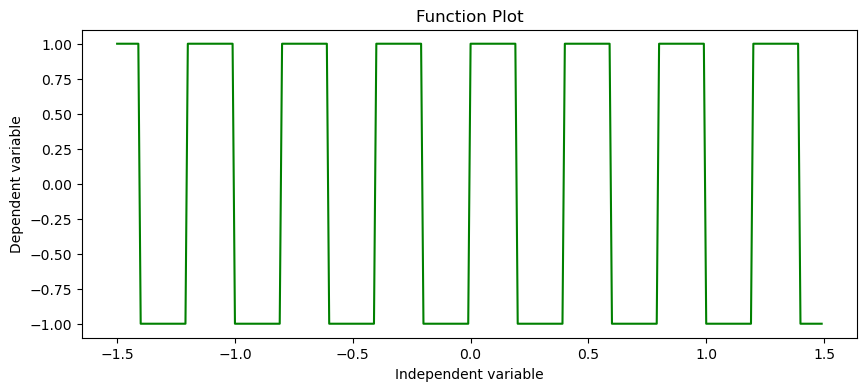

In [36]:
input_tensor = torch.from_numpy(input).float()
output_tensor = torch.from_numpy(output).float()
plt.figure(figsize=(10, 4))
plt.plot(input_tensor.numpy(), output_tensor.numpy(), color='g')
plt.title('Function Plot')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.show()


## Model 1

In [37]:
model_sign_1 = FirstNetworkModel()
optimizer = torch.optim.Adam(model_sign_1.parameters(), lr=1e-3, weight_decay=1e-4)
loss_func = torch.nn.MSELoss()  # mean squared loss
pytorch_total_params = sum(p.numel() for p in model_sign_1.parameters())
print(pytorch_total_params)
nm1_epoch_array, nm1_loss_array, nm1_predict = model_train(model_sign_1, input, output)

571
epoch: 1000, loss = 0.6855
epoch: 2000, loss = 0.4874
epoch: 3000, loss = 0.4687
epoch: 4000, loss = 0.4627
epoch: 5000, loss = 0.4446
epoch: 6000, loss = 0.4429
epoch: 7000, loss = 0.4289
epoch: 8000, loss = 0.4194
epoch: 9000, loss = 0.4353
epoch: 10000, loss = 0.4321
epoch: 11000, loss = 0.4228
epoch: 12000, loss = 0.4136
epoch: 13000, loss = 0.4315
epoch: 14000, loss = 0.4222
epoch: 15000, loss = 0.4099
epoch: 16000, loss = 0.4124
epoch: 17000, loss = 0.4337
epoch: 18000, loss = 0.4110
epoch: 19000, loss = 0.4475
epoch: 20000, loss = 0.4230
Epoch Reached Max size


## Model 2

In [38]:
model_sign_2 = SecondNetworkModel()
optimizer = torch.optim.Adam(model_sign_2.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()
pytorch_total_params = sum(p.numel() for p in model_sign_2.parameters())
print(pytorch_total_params)
m2_epoch_arr, m2_loss_arr, m2_prediction = model_train(model_sign_2, input, output)

572
epoch: 1000, loss = 0.6932
epoch: 2000, loss = 0.3167
epoch: 3000, loss = 0.1871
epoch: 4000, loss = 0.1540
epoch: 5000, loss = 0.1421
epoch: 6000, loss = 0.1357
epoch: 7000, loss = 0.1317
epoch: 8000, loss = 0.1258
epoch: 9000, loss = 0.1184
epoch: 10000, loss = 0.1151
epoch: 11000, loss = 0.1140
epoch: 12000, loss = 0.1135
epoch: 13000, loss = 0.1056
epoch: 14000, loss = 0.1031
epoch: 15000, loss = 0.1015
epoch: 16000, loss = 0.1026
epoch: 17000, loss = 0.1007
epoch: 18000, loss = 0.0966
epoch: 19000, loss = 0.0932
epoch: 20000, loss = 0.0925
Epoch Reached Max size


## Model 3

In [39]:
model_sign_3 = ThirdNetworkModel()
optimizer = torch.optim.Adam(model_sign_3.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()
pytorch_total_params = sum(p.numel() for p in model_sign_3.parameters())
print(pytorch_total_params)
m3_epoch_arr, m3_loss_arr, m3_prediction = model_train(model_sign_3, input, output)

571
epoch: 1000, loss = 0.6967
epoch: 2000, loss = 0.4003
epoch: 3000, loss = 0.2892
epoch: 4000, loss = 0.2500
epoch: 5000, loss = 0.2337
epoch: 6000, loss = 0.2236
epoch: 7000, loss = 0.2165
epoch: 8000, loss = 0.2112
epoch: 9000, loss = 0.2081
epoch: 10000, loss = 0.2051
epoch: 11000, loss = 0.2027
epoch: 12000, loss = 0.2012
epoch: 13000, loss = 0.1996
epoch: 14000, loss = 0.1984
epoch: 15000, loss = 0.1973
epoch: 16000, loss = 0.1962
epoch: 17000, loss = 0.1952
epoch: 18000, loss = 0.1943
epoch: 19000, loss = 0.1936
epoch: 20000, loss = 0.1927
Epoch Reached Max size


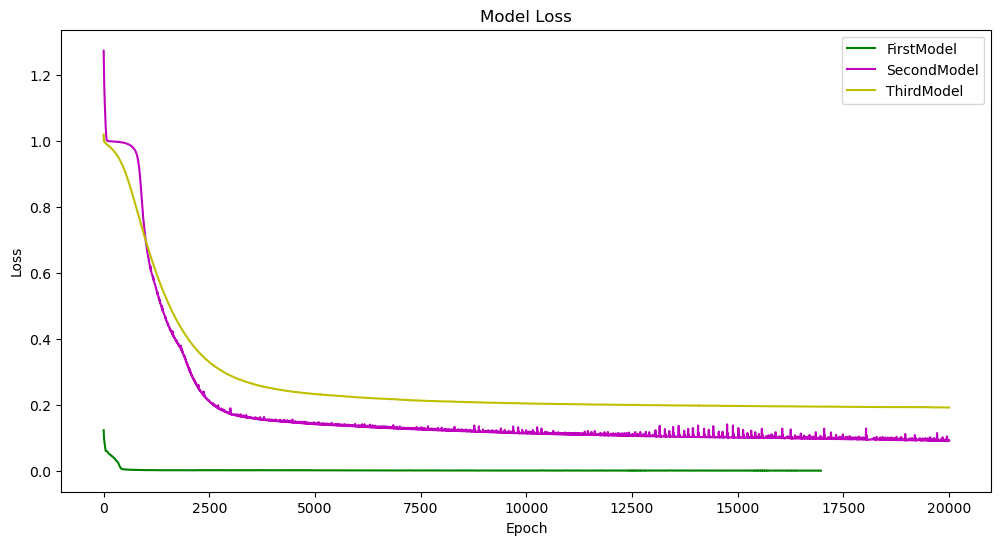

In [41]:
plt.figure(figsize=(12,6))
plt.plot(m1_epoch_arr, m1_loss_arr, color = "g")
plt.plot(m2_epoch_arr, m2_loss_arr, color = "m")
plt.plot(m3_epoch_arr, m3_loss_arr, color = "y")
plt.title('Model Loss')
plt.legend(['FirstModel', 'SecondModel','ThirdModel'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

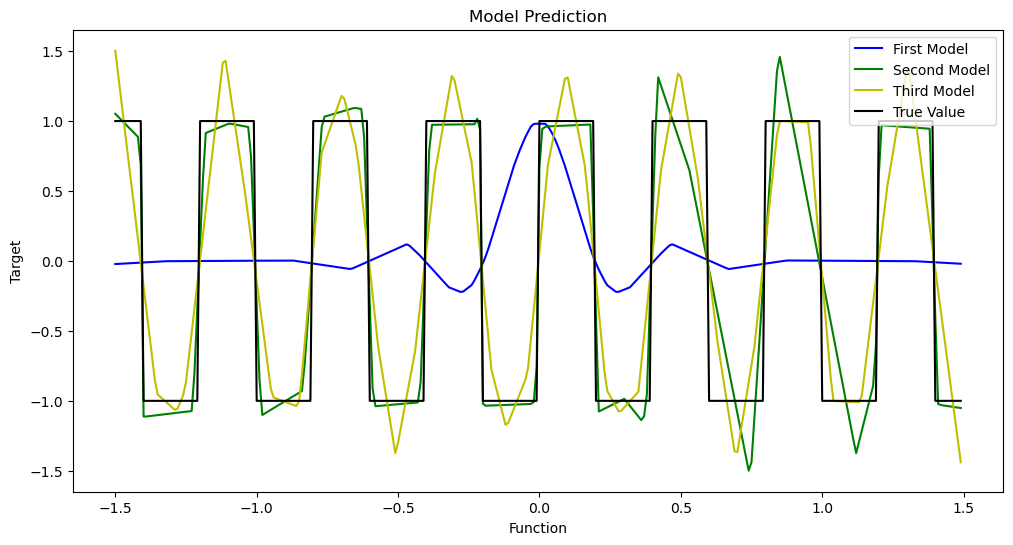

In [42]:
plt.figure(figsize=(12,6))
plt.plot(input, m1_prediction.data, color="b", label = 'First Model')
plt.plot(input, m2_prediction.data, color="g", label = 'Second Model')
plt.plot(input, m3_prediction.data, color="y", label = 'Third Model')
plt.plot(input, output, color="black", label = 'True Value')
plt.title('Model Prediction')
plt.xlabel('Function')
plt.ylabel('Target')
plt.legend()
plt.show()